In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import cm

from math import sqrt
import pickle
def load_examples(name):
    with open("examples/{}.eg.pkl".format(name), 'rb') as f:
         examples = pickle.load(f)
    return examples

def save_examples(name, good_data_tuple):
    with open("examples/{}.eg.pkl".format(name), 'wb') as f:
        pickle.dump(good_data_tuple, f)


In [2]:
def plot_matrix(attn, figsize):

    moved, char_input, word_output, desc = attn
    abbrev = [c.replace("<SEP-1>", "|").replace("<SEP-2>","-").replace("<>","||").replace("<END>","<E>") for c in char_input]
    
    fig, ax = plt.subplots(1,figsize=figsize ) 
#     ax.set_title("Attention during Translation", )
    cax = ax.matshow(moved, aspect='auto', vmax=1)
    
    cbar = fig.colorbar(cax, ticks=[0,0.5, 1], cmap=cm.viridis)
    cbar.ax.set_yticklabels(['0', '0.5', '1'])
    
    ax.set_xticks(np.arange(len(char_input)))
    ax.set_xticklabels( abbrev, fontsize=22)
    ax.set_yticks(np.arange(len(word_output)))
    ax.set_yticklabels(word_output, fontsize=22)
    ax.set_ylabel(r"Output", fontsize=26)
    ax.set_xlabel(r"Input", fontsize=26)
    ax.xaxis.set_label_position('top') 
#     plt.savefig("hey.png")
    plt.show()

In [3]:
attn0 = load_examples("ATTENTION_0")
attn1 = load_examples("ATTENTION_1")
attn2 = load_examples("ATTENTION_2")

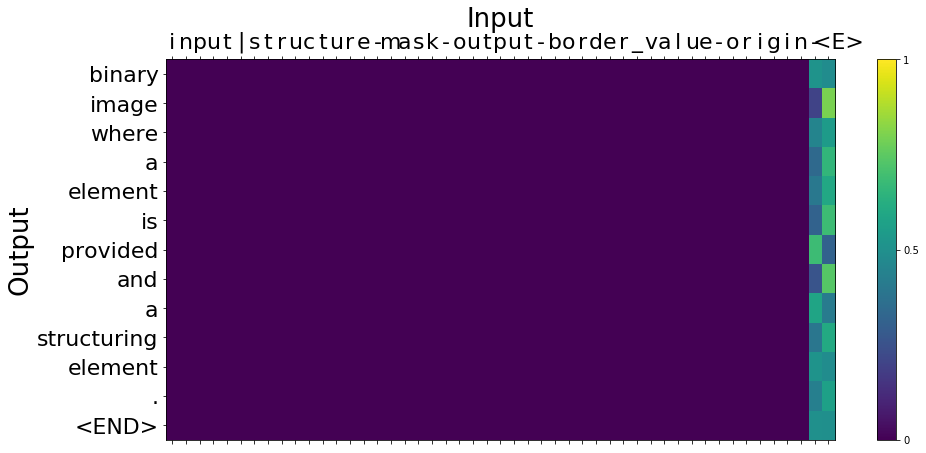

In [4]:
plot_matrix(attn0, (15, 7))

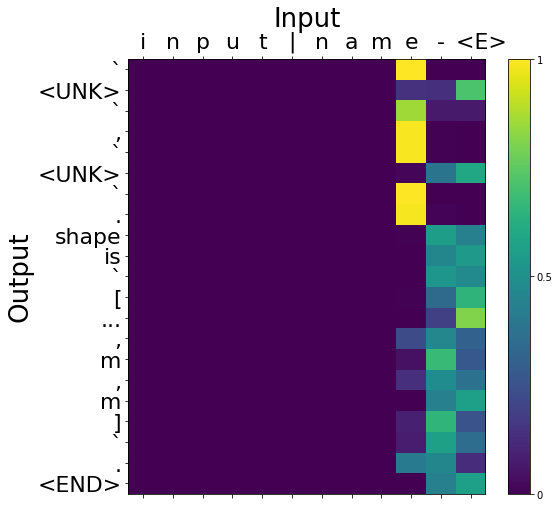

In [5]:
plot_matrix(attn1, ( 8, 8 ))

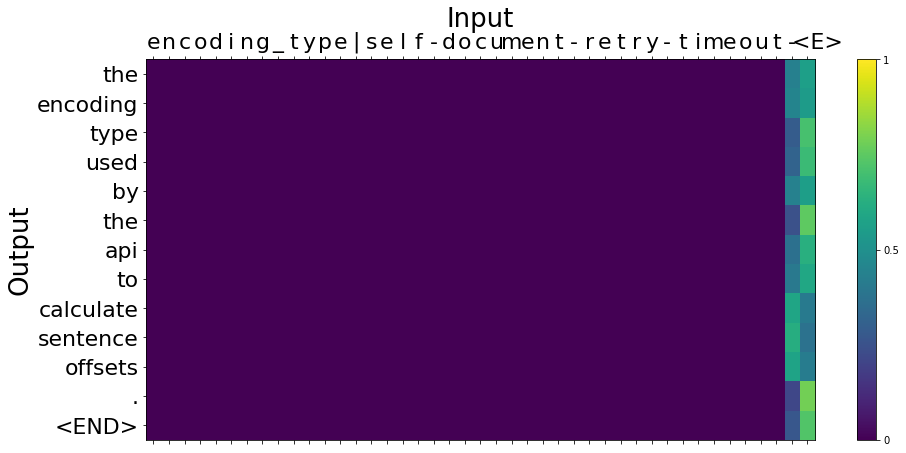

In [6]:
plot_matrix(attn2, ( 15, 7 ))

In [7]:

SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': [r'\usepackage{gensymb}'],
              'axes.labelsize': 22, # fontsize for x and y labels (was 10)
              'axes.titlesize': 22,
#               'text.fontsize': 22, # was 10
              'legend.fontsize': 22, # was 10
              'xtick.labelsize': 22,
              'ytick.labelsize': 22,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

%matplotlib inline
latexify()
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
plt.style.use('ggplot')
width = 1/1.5
rc('text', usetex=True)
rc('axes', linewidth=2)
rc('font', weight='bold')
rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
# rcParams['text.latex.preamble'] = ['']


In [8]:
def plot_hist(data_and_labels):
    fig, ax = plt.subplots(1, figsize=(12,5))
    for x,l,a in data_and_labels:
        ax.hist(x, density=True , bins=50, alpha=a, label=l)
    ax.set_title("Histogram of Attention Entropy for Code2Vec Decoder Model", fontsize=28)
#     yt = ax.get_yticks()
#     set 
#     yt = ["{:.2f}%".format(y)  for y in  100*yt/len(x)]
#     ax.set_yticklabels( yt, rotation=0,  fontsize=18)
#     for tick in ax.xaxis.get_major_ticks():
#         tick.label.set_fontsize(18) 
#     for tick in ax.yaxis.get_major_ticks():
#         tick.label.set_fontsize(18) 
    ax.set_ylabel(r"\textbf{Frequency (\%)}", fontsize=22)
    ax.set_xlabel(r"\textbf{Attention Entropies}", fontsize=22)
    ax.legend(fontsize = 'xx-large')
    plt.show()

In [9]:
(attn_weights_c2v, all_trans_c2v, entropies_c2v) = load_examples( "FOURTH_FIFTH_attn_weight_entropies_CODE2VEC_SOLO",  )
(attn_weights_c2v_margs, all_trans_c2v_margs, entropies_c2v_margs) = load_examples( "FOURTH_FIFTH_attn_weight_entropies_CODE2VEC_MASK_ARGS",  )
(attn_weights_c2v_mall, all_trans_c2v_mall, entropies_c2v_mall) = load_examples( "FOURTH_FIFTH_attn_weight_entropies_CODE2VEC_MASK_ALL",  )
(attn_weights_c2v_enc, all_trans_c2v_enc, entropies_c2v_enc) = load_examples( "SIXTH_attn_weight_entropies_CODE2VEC_ENC",  )
uniform_entropies = load_examples("UNIFORM_ENTROPIES")
# rows = [np.trim_zeros(row) for array in attn for row in array]
# entropies = [-np.sum(r * np.log(r)) for r in rows]
# uniform_entropies = [-np.log(1./len(r)) for r in rows]

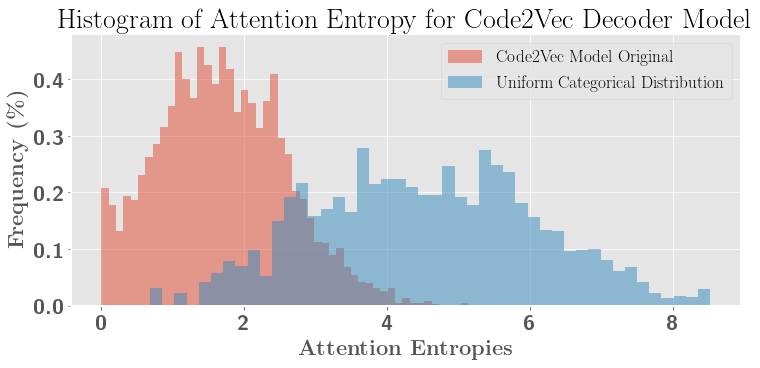

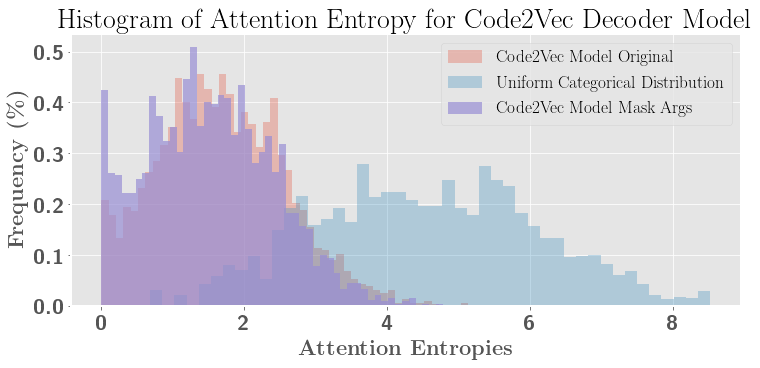

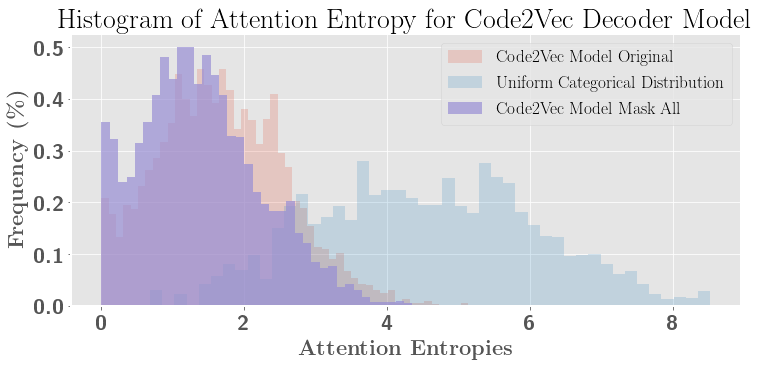

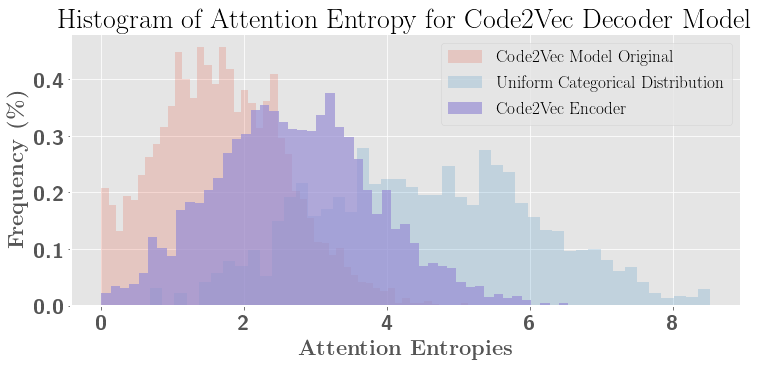

In [10]:
plot_hist([
    (entropies_c2v,'Code2Vec Model Original', 0.5),
    (uniform_entropies,'Uniform Categorical Distribution', 0.5), 
])

plot_hist([
    (entropies_c2v,'Code2Vec Model Original', 0.3),
    (uniform_entropies,'Uniform Categorical Distribution', 0.3), 
    (entropies_c2v_margs,'Code2Vec Model Mask Args', 0.7),
])

plot_hist([
    (entropies_c2v,'Code2Vec Model Original', 0.2),
    (uniform_entropies,'Uniform Categorical Distribution', 0.2), 
    (entropies_c2v_mall,'Code2Vec Model Mask All', 0.7)
])

plot_hist([
    (entropies_c2v,'Code2Vec Model Original', 0.2),
    (uniform_entropies,'Uniform Categorical Distribution', 0.2), 
    (entropies_c2v_enc,'Code2Vec Encoder', 0.7)
])


In [11]:
def plot_hist_2(data_and_labels):
    fig, ax = plt.subplots(1, figsize=(10,5))
    for x,l,a in data_and_labels:
        ax.hist(x, bins=50, alpha=a, label=l)
    ax.set_title("Histogram of Sentence Level Bleu Scores on Validation Set", fontsize=26)

    ax.set_ylabel(r"\textbf{Counts}", fontsize=22)
    ax.set_xlabel(r"\textbf{Sentence Bleu Score}", fontsize=22)
    ax.legend()
    plt.yscale('log')
    plt.show()

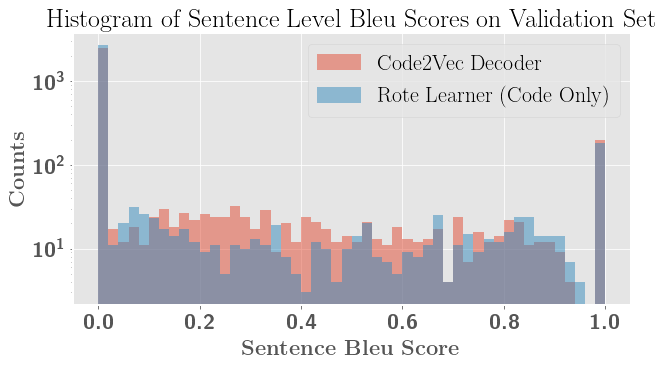

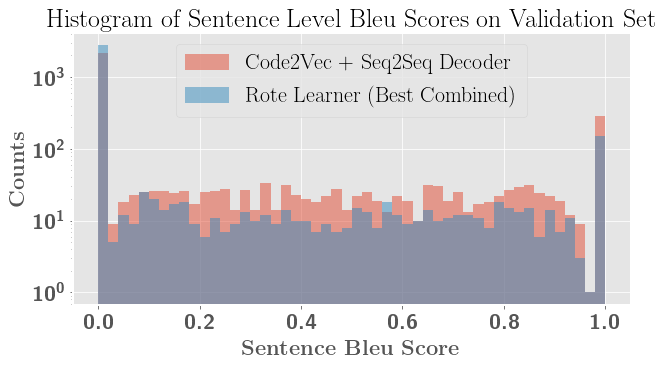

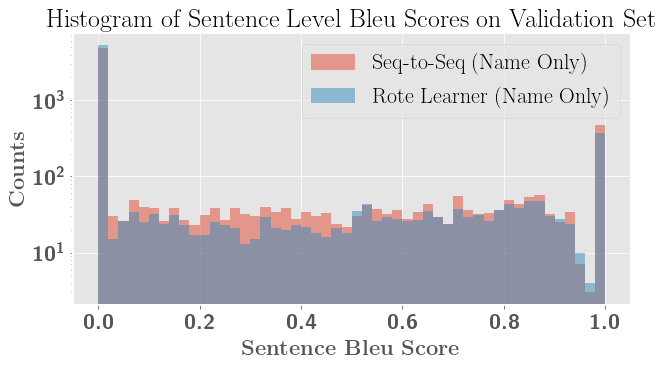

In [12]:
bsc2_mall = load_examples("Bleu_C2V_Mall")   
bsc2v_margs = load_examples("Bleu_C2V_Margs")
bsc2e = load_examples("Bleu_C2E")
bsc2v = load_examples("Bleu_C2V")
bs_rl = load_examples("Bleu_RL")
bs_rl_comb = load_examples("Bleu_RL_comb")
bs_s2s = load_examples("Bleu_S2S" )
bs_rl_name_only = load_examples("Bleu_RL_name_only" )

plot_hist_2([
    (bsc2v,'Code2Vec Decoder', 0.5), 
    (bs_rl,'Rote Learner (Code Only)', 0.5),
])

plot_hist_2([
    (bsc2e,'Code2Vec + Seq2Seq Decoder ', 0.5), 
    (bs_rl_comb,'Rote Learner (Best Combined)', 0.5),
    
])

plot_hist_2([
    (bs_s2s,'Seq-to-Seq (Name Only)', 0.5), 
    (bs_rl_name_only,'Rote Learner (Name Only)', 0.5), 
])


In [13]:
def plot_attns_bar(attn_bar_list):

    
    fig, ax = plt.subplots(1,figsize=(15,8) )
    ax = [ax]
    j=0
    
    for i , (attn_bar, title) in enumerate(attn_bar_list):
        attn, translation, ptvs = attn_bar
        [print(a, p) for a, p in zip(attn, ptvs)]
    
        # saved badly, need to match up paths
    
        F="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
        attention = sorted([a for a in np.trim_zeros(attn)])
        attention, ptvs = zip(*sorted(zip(attention, ptvs), key=lambda x:x[1], reverse=True))
        
        print()
        labels = ["Path {}".format(F[i] if i < len(F) else i) for i in (range(len(ptvs)))]
        [print(p) for p in (labels)]
        print()
        width = 0.3
    
        ax[j].bar(5*np.arange(len(attention)) + (i-1.5)*np.ones(len(attention)) ,  attention,alpha=0.7,label=title)
    
    ax[j].set_title("Attention Scores per Path".format(F[j]), fontsize=22) #loc="right", fontsize=18)
    ax[j].set_xticks(5*np.arange(len(labels)))
    ax[j].set_xticklabels( labels, rotation=0,  fontsize=18)
    ax[j].set_xlabel(r"\textbf{Paths}", fontsize=22)
    ax[j].set_ylabel(r"\textbf{Attention Scores}", fontsize=22)
    ax[j].legend()
    plt.show()
    

In [14]:
attn_bar1 = load_examples("XKCD_c2v" )
attn_bar2 = load_examples("XKCD_c2v_margs" )
attn_bar3 = load_examples("XKCD_c2v_mall" )
attn_bar4 = load_examples("XKCD_c2e" )

0.6620852 <UNK> : \mintinline[]{python}{<UNK>}
0.025747681 <UNK> : \mintinline[]{python}{name}
0.025747681 <UNK> : \mintinline[]{python}{len}
0.00038296028 <UNK> : \mintinline[]{python}{palette}
0.00042421743 <UNK> : \mintinline[]{python}{palette}
0.039429933 Name <- comprehension -> Name : \mintinline[]{python}{name}
0.16645268 <UNK> : \mintinline[]{python}{color_palette}
0.07928311 Name <- comprehension <- ListComp <- Assign <- FunctionDef -> Assign -> ListComp -> comprehension : \mintinline[]{python}{<UNK>}
0.00044646082 Name <- comprehension <- ListComp <- Assign -> Name : \mintinline[]{python}{palette}

Path A
Path B
Path C
Path D
Path E
Path F
Path G
Path H
Path I

0.2901627 <UNK> : \mintinline[]{python}{<UNK>}
0.16241753 <UNK> : \mintinline[]{python}{name}
0.16241753 <UNK> : \mintinline[]{python}{len}
2.1515483e-05 Name <- comprehension -> Name : \mintinline[]{python}{name}
0.00011088257 Name <- comprehension <- ListComp <- Assign <- FunctionDef -> Assign -> ListComp -> comprehe

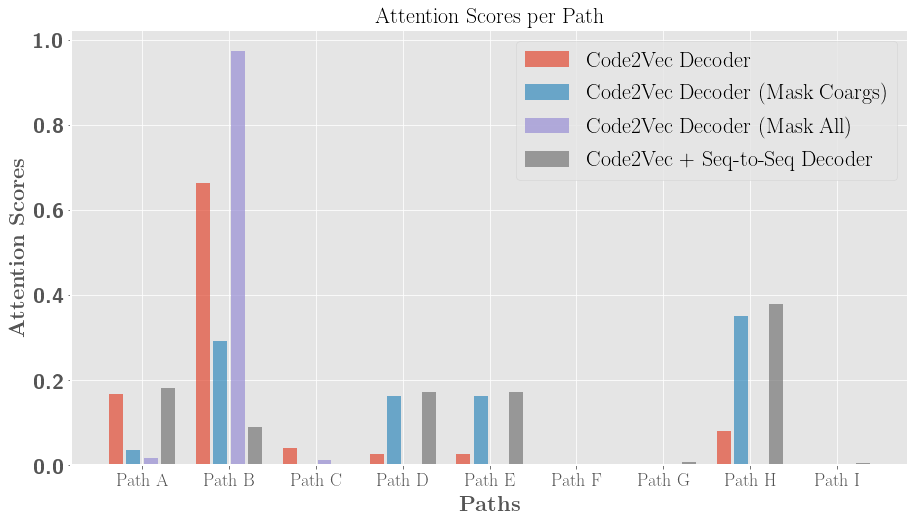

array([0.6620852 , 0.02574768, 0.02574768, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [15]:
plot_attns_bar([(attn_bar1, "Code2Vec Decoder"),
                (attn_bar2, "Code2Vec Decoder (Mask Coargs)"),
                (attn_bar3, "Code2Vec Decoder (Mask All)"),
                (attn_bar4, "Code2Vec + Seq-to-Seq Decoder")])

attn_bar1[0]

In [16]:
desc_filled = load_examples('data_desc_filled')
name_filled = load_examples('data_name_filled')

In [34]:
def plot_hist(desc_data, name_data):
    TRUNCATE_DESC = 150
    TRUNCATE_CHAR = 40
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    tot = sum(desc_data)
    desc_trunc = [100* d/tot for d in desc_data[:TRUNCATE_DESC] ]
    
    tot = sum(name_data)
    name_trunc = [100* d/tot for d in name_data[:TRUNCATE_CHAR] ]
#     trunc.append(sum(data[TRUNCATE:]))

    ax[0].bar(range(len(desc_trunc)),desc_trunc)
    
    ax[0].set_title("Distribution of Argument Description Length in Tokens", fontsize=22)
    ax[0].set_xlabel(r"\textbf{Number of Tokens in Description}", fontsize=22)
    ax[0].set_ylabel(r"\textbf{Percentage of Dataset}", fontsize=22)
    
    ax[1].bar(range(len(name_trunc)),name_trunc)
    ax[1].set_title("Distribution of Argument Name Length in Characters", fontsize=22)
    ax[1].set_xlabel(r"\textbf{Number of Characters in Name}", fontsize=22)
    ax[1].set_ylabel(r"\textbf{Percentage of Dataset}", fontsize=22)
    plt.tight_layout()
    plt.show()

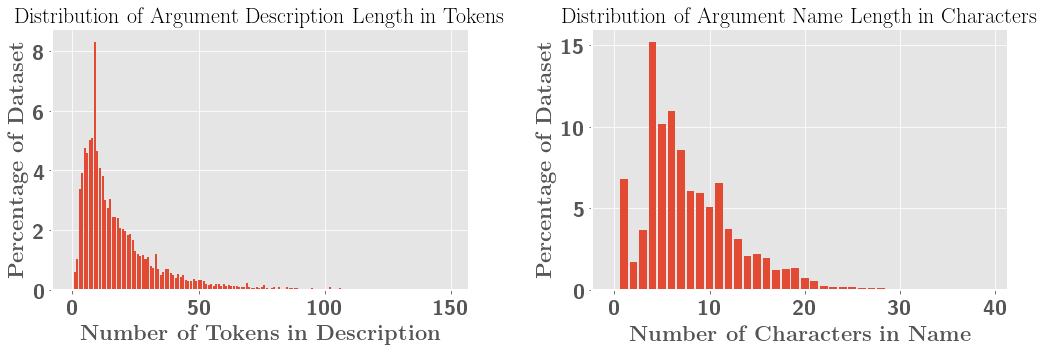

In [35]:
plot_hist(desc_filled, name_filled)


In [200]:
def load_cloc():
    cloc = []
    with open("examples/cloc.file", "r") as f:
        for line in f:
            if '.py' in line:
                cloc.append(int(line.split(' ')[-1].strip()))
    unique_cloc = []
    with open("examples/cloc.unique.file", "r") as f:
        for line in f:
            if '.py' in line:
                unique_cloc.append(int(line.split(' ')[-1].strip()))
    return cloc, unique_cloc   
cloc, unique_cloc = load_cloc()

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return '\\textbf{'+s +'}'
    else:
        return s

def plot_cloc(cloc, unique_cloc):
    RANGE =150
    UNIQUE_RANGE = 150
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    print(100*len([c for c in cloc if c > RANGE])/len(cloc))
    print(100*len([c for c in unique_cloc if c > RANGE])/len(cloc))
    formatter = plt.FuncFormatter(to_percent)
    
    ax[0].yaxis.set_major_formatter(formatter)
    
    ax[0].hist(cloc, bins=50, range=(0,RANGE), density=True)
    ax[0].set_title("Lines of Code per Argument in Dataset", fontsize=22)


# Set the formatter

    ax[0].set_xlabel(r"\textbf{Lines of Code}", fontsize=22)
    ax[0].set_ylabel(r"\textbf{\% of Dataset}", fontsize=22)
    ax[1].yaxis.set_major_formatter(formatter)
    
    ax[1].hist(unique_cloc, bins=50, range=(0,RANGE), density=True)
    ax[1].set_title("Lines of Code per Unique Functions in Dataset", fontsize=22)
    ax[1].set_xlabel(r"\textbf{Lines of Code}", fontsize=22)
    ax[1].set_ylabel(r"\textbf{\% of Dataset}", fontsize=22)
    plt.tight_layout()
    plt.show()

In [201]:
np.mean(cloc), np.std(cloc), np.mean(unique_cloc), np.std(unique_cloc), np.sum(cloc), np.sum(unique_cloc)

(34.200295865534216,
 56.790804288590984,
 22.8303648625281,
 42.387197266627936,
 1340891,
 264056)

2.3873287933277223
0.3111689239166475


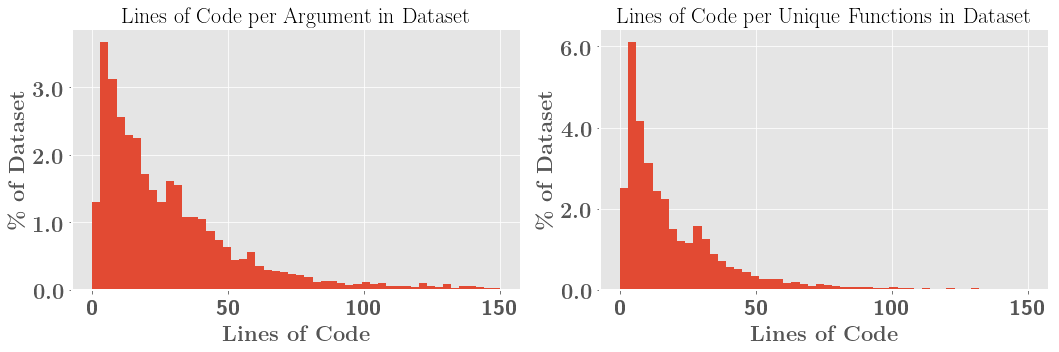

In [202]:
plot_cloc(cloc, unique_cloc)

In [84]:
def plot_cloc(desc_data, name_data):
    TRUNCATE_DESC = 50
    TRUNCATE_CHAR = 50
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    tot = len(desc_data)
    desc_trunc = [100* d/tot for d in desc_data[:TRUNCATE_DESC] ]
    
    tot = len(name_data)
    name_trunc = [100* d/tot for d in name_data[:TRUNCATE_CHAR] ]
#     trunc.append(sum(data[TRUNCATE:]))

    ax[0].bar(range(len(desc_trunc)),desc_trunc)
    
    ax[0].set_title("Distribution of Argument Description Length in Tokens", fontsize=22)
    ax[0].set_xlabel(r"\textbf{Number of Tokens in Description}", fontsize=22)
    ax[0].set_ylabel(r"\textbf{Percentage of Dataset}", fontsize=22)
    
    ax[1].bar(range(len(name_trunc)),name_trunc)
    ax[1].set_title("Distribution of Argument Name Length in Characters", fontsize=22)
    ax[1].set_xlabel(r"\textbf{Number of Characters in Name}", fontsize=22)
    ax[1].set_ylabel(r"\textbf{Percentage of Dataset}", fontsize=22)
    plt.tight_layout()
    plt.show()

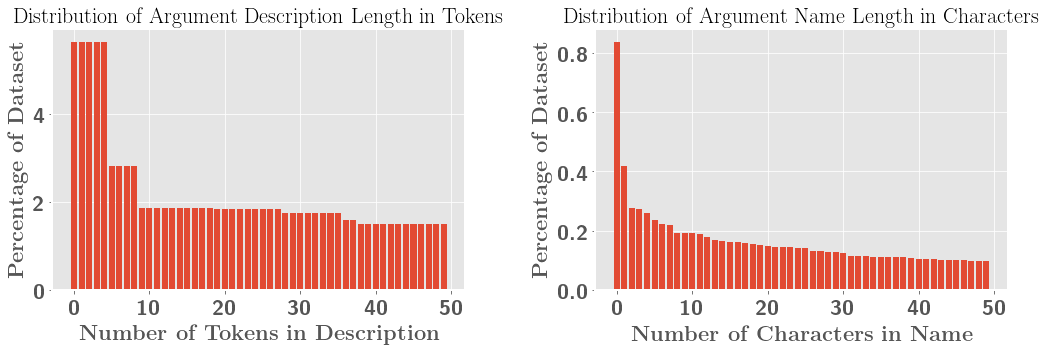

In [85]:
plot_cloc(cloc, unique_cloc)